In [1]:
# run this cell
from datascience import *
from pandas import read_stata
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Child Mortality in Brazil

Import the data file Brazil_child_mortality_2014

In [4]:
data = Table.read_table('Brazil_child_mortality_2014.csv')
data.show(3)

idade,sex,race,codmunres,moms_age,moms_school,num_live_kids,num_deceased_kids,gestation,weight_grams,causabas,state,icd10_letter,icd10_number,icd10_deciml,age
115,M,Mixed,110015,16,4-7 years,0,0,22-27 weeks,1025,P072,11,P,7,2,0
102,M,White,110001,18,Unknown,0,0,22-27 weeks,630,P073,11,P,7,3,0
204,M,Mixed,110146,16,4-7 years,1,0,37-41 weeks,3200,Q202,11,Q,20,2,4


How many child deaths were in 2014?

In [5]:
data.num_rows

38432

Examine the distribution of ages of the children when they died.
Make a histogram.

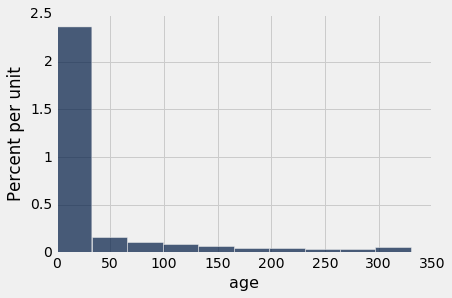

In [6]:
# remove cells with nan
nonmissing=data.where('age',are.above(-1))
nonmissing.hist('age')

The histogram may be quite spread out.  Focus in on the age range you think may be most important.

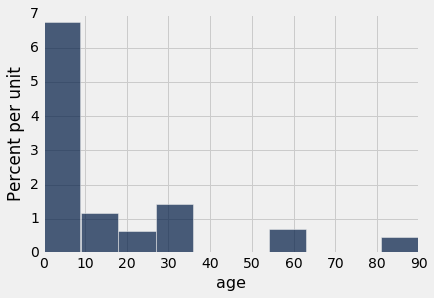

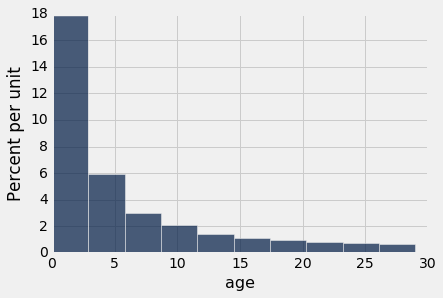

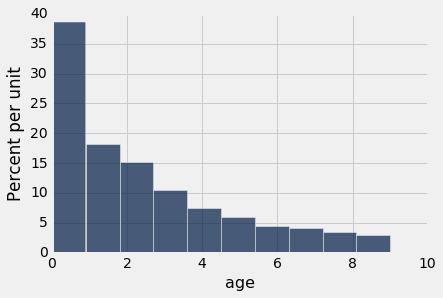

In [7]:
nonmissing=data.where('age',are.between(-1,100))
nonmissing.hist('age')
nonmissing=data.where('age',are.between(-1,30))
nonmissing.hist('age')
nonmissing=data.where('age',are.between(-1,10))
nonmissing.hist('age')

## Child Mortality by Cause

Brazil uses the International Classification of Diseases for death records.
I have divided the classification variable (causabas) into three variables: icd10_letter, icd10_number and icd10_decimal for easier manipulation.  See the website to see how the diseases are categorized.

https://en.wikipedia.org/wiki/ICD-10#List

Click through to see more and more specific catagorizations.








Group the data by most general cause of death (letter).  Which has the most deaths?


You can use the first data table you explored; do not use nonmissing. 

In [10]:
groups=data.group('icd10_letter')
groups.show()

icd10_letter,count
A,1581
B,131
C,112
D,190
E,450
G,468
H,9
I,387
J,1909
K,311


For whichever letter is the largest category, examine the subgroups (number division).
Use "group" to determine the two largest sub categories.

In [12]:
Psub=data.where('icd10_letter',are.equal_to('P'))
Psub.show(10)
Psub.num_rows
groupP=Psub.group('icd10_number')
groupP.show()

idade,sex,race,codmunres,moms_age,moms_school,num_live_kids,num_deceased_kids,gestation,weight_grams,causabas,state,icd10_letter,icd10_number,icd10_deciml,age
115,M,Mixed,110015,16,4-7 years,0,0,22-27 weeks,1025,P072,11,P,7,2,0
102,M,White,110001,18,Unknown,0,0,22-27 weeks,630,P073,11,P,7,3,0
202,F,Mixed,110020,17,8-11 years,0,0,22-27 weeks,700,P220,11,P,22,0,2
101,M,Indigenous,110004,28,Unknown,2,0,28-31 weeks,1740,P027,11,P,2,7,0
201,M,White,110002,nan,Unknown,nan,nan,Unknown,500,P291,11,P,29,1,1
101,M,Mixed,110012,23,8-11 years,1,0,22-27 weeks,800,P369,11,P,36,9,0
104,M,Mixed,110004,20,8-11 years,1,0,37-41 weeks,2270,P012,11,P,1,2,0
215,F,White,110020,41,Unknown,nan,nan,32-36 weeks,1160,P369,11,P,36,9,15
203,M,White,110020,27,12 or more,0,0,22-27 weeks,525,P369,11,P,36,9,3
206,M,White,110020,21,8-11 years,2,0,28-31 weeks,1105,P369,11,P,36,9,6


icd10_number,count
0,2119
1,1668
2,1410
3,367
4,83
5,105
7,1935
8,7
10,6
11,6


Let's have the table you just created show portion of deaths as well as number of deaths.
Define a function that will convert the count to a fraction.

In [14]:
# Replace Z with whichever letter had the most deaths
def fractionP(x):
     return (x/22347)

Apply the function to the count column and add it to the table.  Show only subcategories (icd10_number) with the portion of deaths above 0.05 of deaths in the Letter category.

In [15]:
Frac_groupP=groupP.with_column('Fraction', groupP.apply(fractionP, 'count'))
Frac_groupP.where("Fraction", are.above(.05)).sort("Fraction")

icd10_number,count,Fraction
21,1172,0.0524455
2,1410,0.0630957
1,1668,0.0746409
7,1935,0.0865888
0,2119,0.0948226
22,2929,0.131069
36,3213,0.143778


Repeat the exercise for the second largest category of deaths (defined by letter).

## Child Mortality by State

The state of Bahia (code 29) has the highest infant mortality.  The state of Santa Catarina has the lowest (code 42).  Are the compositions of causes of death similar?

Keep just data for one state, and then calculate the portion of deaths for each main grouping (letter).